## II. Import Libraries and set required parameters

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 300) # to display all the columns

import time
from sklearn import metrics

from imblearn.over_sampling import SMOTE #command to install "conda install -c glemaitre imbalanced-learn"

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [259]:
telecomdf =pd.read_csv("telecom_churn_data.csv")

In [260]:
telecomdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,

In [261]:
telecomdf.shape

(99999, 226)

### Clean-up

In [262]:
len(telecomdf['mobile_number'].unique())

99999

In [263]:
telecomdf.shape

(99999, 226)

In [264]:
telecomdf.drop(['mobile_number','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','circle_id',
                'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','std_og_t2c_mou_6',
               'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
               'std_ic_t2o_mou_8','std_ic_t2o_mou_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
               'date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'
                ,'date_of_last_rech_data_9'],axis=1,inplace=True)


In [265]:
telecomdf.shape

(99999, 201)

In [266]:
headers=list(telecomdf.columns)


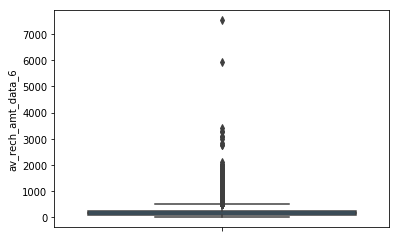

In [267]:
sns.boxplot(y=telecomdf['av_rech_amt_data_6'])

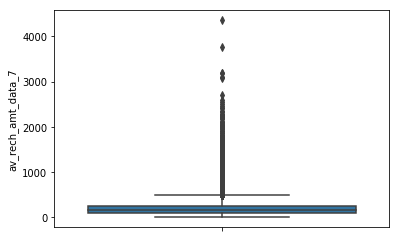

In [268]:
sns.boxplot(y=telecomdf['av_rech_amt_data_7'])

In [269]:
print(telecomdf['total_rech_amt_6'].mean())
telecomdf['total_rech_amt_7'].mean()

327.51461514615147


322.9629696296963

In [270]:
telecomdf['av_rech_amt_data_7'].fillna(0,inplace=True)

In [271]:
telecomdf['av_rech_amt_data_6'].fillna(0,inplace=True)

In [272]:
telecomdf['total_rech_amt_6_7']=telecomdf[['total_rech_amt_6','total_rech_amt_7']].apply(np.mean,axis=1)

In [273]:
average=telecomdf['total_rech_amt_6_7'].quantile(.7)
average

368.5

In [274]:
highchurndf=telecomdf[telecomdf['total_rech_amt_6_7'] >= average]
highchurndf.shape

(30011, 202)

In [275]:
highchurn_usage=highchurndf[~((highchurndf['arpu_6'] < 4) | (highchurndf['arpu_7'] < 4))]
highchurn_usage.shape

(29564, 202)

In [276]:
#highchurn_usage=highchurndf[~(highchurndf['arpu_6'] < 4) | (highchurndf['arpu_7'] < 4)]
#highchurn_usage.shape

#### Dropping the Columns

In [277]:
highchurn_usage.shape

(29564, 202)

In [278]:
def bootstrap(df, n = None, iterations = 2000):
    if n == None:
        n = len(X)
    X_resampled = np.random.choice(df.values, size = (iterations, n), replace = True)
    return X_resample

In [279]:
#for col in highchurn_usage.columns:
 #   highchurn_res = bootstrap_resample(highchurn_usage[col])
#X_resample=bootstrap(highchurn_usage)

In [280]:
#re_usage=bootstrap(highchurn_usage)

In [281]:
highchurn_usage.fillna(0, inplace=True)

In [282]:
#rows = np.random.choice(highchurn_usage.index.values, 10)
#sampled_df = highchurn_usage.ix[rows]
#sampled_df

In [283]:
highchurn_usage.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7
7,1069.180,1349.850,3171.480,500.000,57.840,54.680,52.290,0.000,453.430,567.160,325.910,0.000,16.230,33.490,31.640,0.000,23.740,12.590,38.060,0.000,51.390,31.380,40.280,0.000,308.630,447.380,162.280,0.000,62.130,55.140,53.230,0.000,0.000,0.000,0.000,0.000,422.160,533.910,255.790,0.000,4.300,23.290,12.010,0.000,49.890,31.760,49.140,0.000,6.660,20.080,16.680,0.000,60.860,75.140,77.840,0.000,0.000,0.180,10.010,0.000,4.500,0.000,6.500,0.000,0.000,0.000,0.000,0.000,487.530,609.240,350.160,0.000,58.140,32.260,27.310,0.000,217.560,221.490,121.190,0.000,152.160,101.460,39.530,0.000,427.880,355.230,188.040,0.000,36.890,11.830,30.390,0.000,91.440,126.990,141.330,0.000,52.190,34.240,22.210,0.000,180.540,173.080,193.940,0.000,626.460,558.040,428.740,0.000,0.210,0.000,0.000,0.000,2.060,14.530,31.590,0.000,15.740,15.190,15.140,0.000,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0

In [284]:
highchurn_usage.loc[((highchurn_usage['total_ic_mou_9']==0)& 
                (highchurn_usage['total_og_mou_9']==0)&
                (highchurn_usage['vol_2g_mb_9']==0) & 
                (highchurn_usage['vol_3g_mb_9']==0)),'churn']=1

In [285]:
len(highchurn_usage[highchurn_usage.churn==1])/len(highchurn_usage)*100

8.145041266405087

In [286]:
#highchurn_usage=highchurn_usage.sample(frac=.6,replace=True)
highchurn_usage['churn'].fillna(0,inplace=True)
highchurn_usage[highchurn_usage.churn==1].shape

(2408, 203)

In [287]:
highchurn_usage['churn'].fillna(0,inplace=True)

In [288]:
telecomchurn = highchurn_usage[highchurn_usage.columns.drop(list(highchurn_usage.filter(regex='_9')))]

In [289]:
telecomchurn.shape

(29564, 154)

In [290]:
telecomchurn['churn'].value_counts()

0.000    27156
1.000     2408
Name: churn, dtype: int64

### Building Model

In [291]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecomchurn.drop(['churn'],axis=1)

# Putting response variable to y
y = telecomchurn['churn']

sm = SMOTE(random_state=12, ratio = 1.0)
X_res, y_res = sm.fit_sample(X, y)

X = pd.DataFrame(X_res,  columns=X.columns)
y2 =  pd.DataFrame(y_res)
y2= y2.rename(columns={ 0 : 'churn'})
y = y2['churn']

In [292]:
X.shape

(54312, 153)

In [294]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)

# Splitting the data into train and te
scaleddf=X_scaler.transform(X.values)
telecomchurn = pd.DataFrame(scaleddf, index=X.index, columns=X.columns)
X = pd.DataFrame(scaleddf, index=X.index, columns=X.columns)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9,test_size=0.1,random_state=100)
X_train.shape

(48880, 153)

### PCA

In [296]:
#Improting the PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

pca = PCA(.9,random_state=27)

In [297]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=27,
  svd_solver='auto', tol=0.0, whiten=False)

In [299]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[3], 'Feature':colnames})

,Feature,PC1,PC2,PC3
0,arpu_6,0.047,0.106,0.067
1,arpu_7,0.070,0.137,0.054
2,arpu_8,0.093,0.153,0.035
3,onnet_mou_6,-0.048,0.066,-0.018
4,onnet_mou_7,-0.038,0.095,-0.032


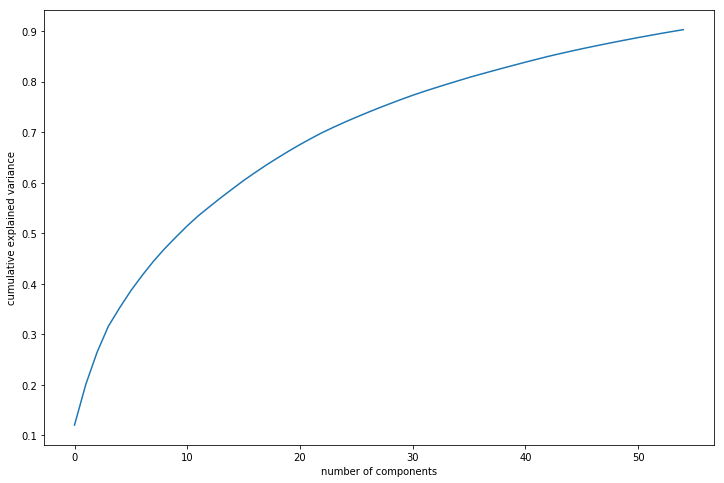

In [301]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [161]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([25.33, 41.12, 51.46, 59.65, 66.73, 72.32, 77.11, 80.42, 82.82,
       85.01, 86.49, 87.91, 89.11, 90.19])

In [162]:
df_train_pca = pca.transform(X_train)
df_train_pca.shape

(48880, 14)

In [163]:
df_test_pca = pca.transform(X_test)

In [164]:
corrmat = np.round(np.corrcoef(df_train_pca.transpose()),decimals=3)

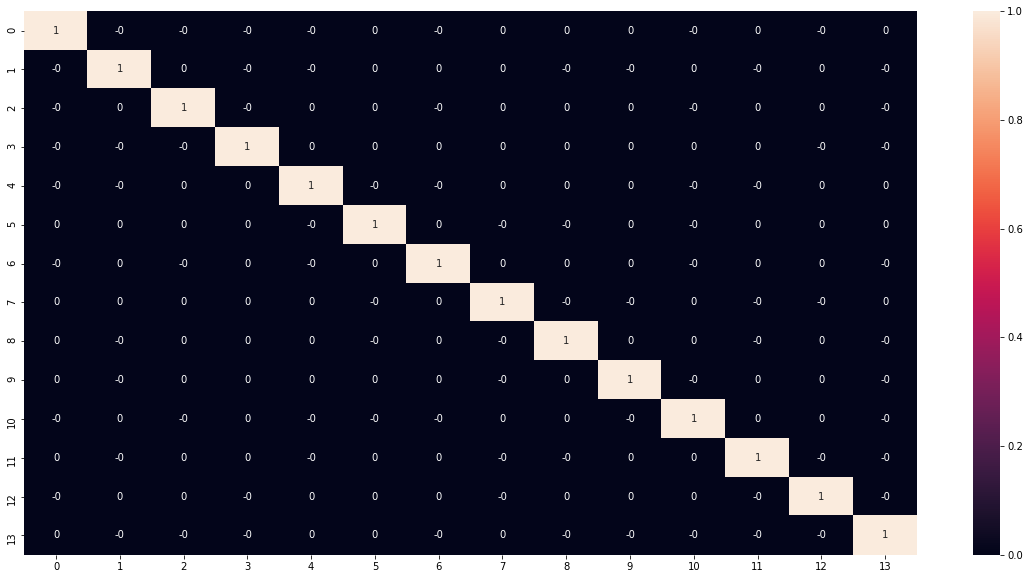

In [165]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

###  Applying Logistic Regression

In [166]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [167]:
y_pred = learner_pca.predict(df_test_pca)

In [168]:
np.round(metrics.mean_squared_error(y_test, y_pred),decimals=2)

0.18

In [169]:
#Making prediction on the test data*
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [170]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
confusion=metrics.confusion_matrix(y_pred=y_pred,y_true=y_test)
print(confusion)

accuracy: 0.8160898379970545 

[[2152  513]
 [ 486 2281]]


In [162]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
confusion=metrics.confusion_matrix(y_pred=y_pred,y_true=y_test)
print(confusion)

accuracy: 0.8126261699394385 

[[2144  535]
 [ 486 2284]]


In [163]:
df_train_pca

array([[ 7.18830683e+02, -4.53243305e+02,  1.16323008e+02, ...,
        -6.46179977e+01, -3.85597571e+02, -5.02461035e+00],
       [-7.12137706e+02,  4.89912939e+02, -2.20730136e+03, ...,
        -7.84559397e+01, -4.43833222e-01,  2.07867669e+02],
       [-1.96943280e+02,  9.07112924e+02, -1.70974359e+03, ...,
         2.06373024e+02,  1.03441549e+02,  1.26692630e+02],
       ...,
       [ 5.83686254e+02, -4.01186418e+02,  3.30043026e+02, ...,
        -2.46322062e+02,  1.79464371e+02,  1.08498508e+02],
       [-1.05291137e+03, -9.12605172e+02,  3.68086250e+02, ...,
        -4.63247527e+01,  1.95457709e+02,  1.08075146e+02],
       [-9.80619269e+02, -8.98865913e+02,  3.08246110e+02, ...,
        -1.25188805e+02, -5.63129266e+01,  9.63768966e+01]])

#### 92% Accuracy and Confusion Matrix

In [164]:
predectedDf=X_test
predectedDf['churn']=y_pred.tolist()
predectedDf.shape

(5449, 154)

In [165]:
predectedDf[predectedDf['churn']==1].head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,churn
42375,390.736131,568.309851,78.126852,243.494984,393.746624,24.004335,339.405385,560.914718,58.746689,6.874532,...,0.307701,0.307701,0.00000,687.230039,0.00,0.000000,0.000000,0.0,547.154832,1.0
43123,801.187095,3.802615,-4.225128,14.974859,0.000000,0.000000,50.969271,3.388552,0.000000,20.981995,...,1.000000,0.000000,0.00000,645.399230,0.00,243.730711,1011.782021,0.0,479.965559,1.0
19967,568.934000,561.930000,496.480000,9.790000,78.880000,32.240000,58.330000,97.790000,109.760000,0.000000,...,0.000000,0.000000,0.00000,1103.000000,41.73,55.360000,138.150000,8.5,725.000000,1.0
37544,529.474442,500.512945,165.665904,223.094022,135.450032,41.667167,570.155625,368.302440,91.131717,0.000000,...,0.864920,0.864920,0.86492,243.522074,0.00,0.000000,0.000000,0.0,580.390187,1.0
30628,446.593138,282.765386,0.000000,359.703121,180.348371,0.000000,142.750829,61.031824,0.000000,0.000000,...,0.000000,0.000000,0.00000,501.369157,0.00,0.000000,0.000000,0.0,400.357228,1.0


In [166]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [167]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8245487364620938


In [168]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.8002986188876446


In [169]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred))

precision 0.8102163887903512
0.8102163887903512


In [170]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

precision 0.8102163887903512
PRECISION SCORE : 0.8102163887903512
RECALL SCORE : 0.8245487364620938
F1 SCORE : 0.8173197351941313


## Optimal Cutoff

In [171]:
y_pred_prob = model_pca.predict_proba(df_test_pca)

In [172]:
y_pred_df = pd.DataFrame(y_pred_prob)

In [173]:
y_pred_1 = y_pred_df.iloc[:,[1]]

In [174]:
y_pred_1.head()

,1
0,0.078687
1,0.022743
2,0.877274
3,0.848580
4,0.556644


In [175]:
y_test_df = pd.DataFrame(y_test)

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [178]:
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [179]:
y_pred_final.head()

,churn,Churn_Prob
0,0.0,0.078687
1,0.0,0.022743
2,1.0,0.877274
3,1.0,0.848580
4,0.0,0.556644


In [180]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [181]:
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0.0,0.078687,0
1,0.0,0.022743,0
2,1.0,0.877274,1
3,1.0,0.848580,1
4,0.0,0.556644,1


In [182]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.078687,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.022743,0,1,0,0,0,0,0,0,0,0,0
2,1.0,0.877274,1,1,1,1,1,1,1,1,1,1,0
3,1.0,0.848580,1,1,1,1,1,1,1,1,1,1,0
4,0.0,0.556644,1,1,1,1,1,1,1,0,0,0,0


In [183]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.508350  0.000000  1.000000
0.1   0.1  0.634061  0.277342  0.979061
0.2   0.2  0.702881  0.450541  0.946931
0.3   0.3  0.750780  0.584173  0.911913
0.4   0.4  0.791521  0.704367  0.875812
0.5   0.5  0.812626  0.800299  0.824549
0.6   0.6  0.814461  0.863009  0.767509
0.7   0.7  0.801248  0.916760  0.689531
0.8   0.8  0.729125  0.950355  0.515162
0.9   0.9  0.580106  0.981710  0.191697


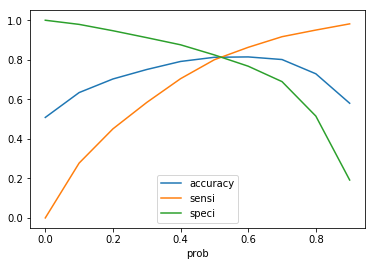

In [184]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [185]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x >= 0.5 else 0)
len(y_pred_final[y_pred_final.churn==1])/(len(y_pred_final[y_pred_final.final_predicted==1]))

0.9826179496275275

In [186]:
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)

0.8126261699394385

In [187]:
confusion=metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )

In [188]:
y_pred_final.shape

(5449, 14)

In [189]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [190]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)

print("specificity",specificity)
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred))
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

sensitivity 0.8245487364620938
specificity 0.8002986188876446
precision 0.8102163887903512
0.8102163887903512
precision 0.8102163887903512
PRECISION SCORE : 0.8102163887903512
RECALL SCORE : 0.8245487364620938
F1 SCORE : 0.8173197351941313


In [191]:
#--------------

In [192]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))



accuracy: 0.9223710772618829


In [193]:
np.round(metrics.mean_squared_error(y_test, y_pred),decimals=2)

0.08

In [194]:
confusion=metrics.confusion_matrix(y_pred=y_pred,y_true=y_test)
print(confusion)

[[2477  202]
 [ 221 2549]]


In [195]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [196]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)

print("specificity",specificity)
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred))
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

sensitivity 0.9202166064981949
specificity 0.9245987308697275
precision 0.9265721555797891
0.9265721555797891
precision 0.9265721555797891
PRECISION SCORE : 0.9265721555797891
RECALL SCORE : 0.9202166064981949
F1 SCORE : 0.9233834450280747


#  Applying Random Forest


In [197]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [198]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [200]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [201]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.92      0.92      0.92      2679
        1.0       0.92      0.92      0.92      2770

avg / total       0.92      0.92      0.92      5449



In [202]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[2463  216]
 [ 208 2562]]


In [203]:
print(accuracy_score(y_test,predictions))

0.9221875573499725


# Hyperparameter Tuning

Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [204]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [205]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.214152,0.007005,0.749352,0.752702,2,{'max_depth': 2},4,0.744392,0.752148,0.748853,...,0.753212,0.757463,0.760759,0.752951,0.739547,0.744028,0.008007,2.780415e-07,0.007294,0.004818
1,0.557993,0.009812,0.824404,0.835142,7,{'max_depth': 7},3,0.817088,0.834417,0.816458,...,0.825821,0.837026,0.841322,0.837255,0.821334,0.833941,0.006186,4.025076e-04,0.009103,0.001690
2,0.834598,0.014410,0.875880,0.917795,12,{'max_depth': 12},2,0.873267,0.920382,0.871418,...,0.873139,0.917506,0.885070,0.915951,0.876504,0.918118,0.010362,4.923820e-04,0.004881,0.001475
3,0.968886,0.016612,0.907205,0.977974,17,{'max_depth': 17},1,0.903242,0.979732,0.902417,...,0.905670,0.976751,0.914950,0.977235,0.909749,0.980167,0.004710,4.901740e-04,0.004636,0.001667


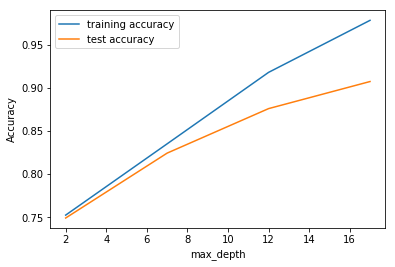

In [206]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning n_estimators

In [207]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [208]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.520696,0.063247,0.784431,0.788576,100,{'n_estimators': 100},4,0.777732,0.787712,0.782502,...,0.788905,0.794606,0.793086,0.786040,0.779931,0.786881,0.013649,0.000751,0.005723,0.003075
1,17.479355,0.309620,0.786633,0.790330,500,{'n_estimators': 500},1,0.777019,0.789369,0.784746,...,0.788293,0.792082,0.793800,0.787136,0.789313,0.793841,0.046977,0.001851,0.005609,0.002356
2,31.784198,0.551591,0.786552,0.790442,900,{'n_estimators': 900},2,0.779466,0.791128,0.785663,...,0.785947,0.791394,0.794616,0.788360,0.787069,0.791547,0.355580,0.005422,0.004830,0.001214
3,47.222942,0.856713,0.786164,0.789621,1300,{'n_estimators': 1300},3,0.778956,0.789700,0.786173,...,0.786457,0.789813,0.793494,0.787060,0.785743,0.790578,3.447664,0.062498,0.004603,0.001364


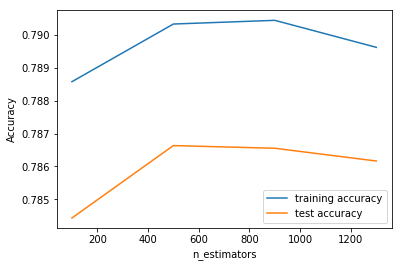

In [209]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning max_features
Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [210]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [211]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.496554,0.008611,0.780638,0.783936,4,{'max_features': 4},2,0.768556,0.778177,0.773733,...,0.789109,0.798965,0.784622,0.779004,0.787171,0.785072,0.021805,0.000797,0.008049,0.007932
1,0.894431,0.008611,0.786266,0.790095,8,{'max_features': 8},1,0.774062,0.784704,0.795554,...,0.789721,0.794912,0.789007,0.781961,0.782990,0.787595,0.021765,0.000488,0.007286,0.007076


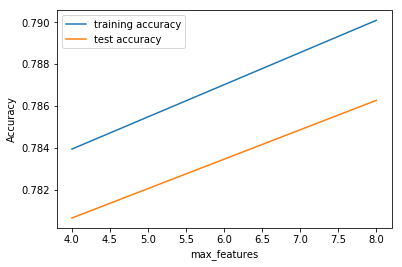

In [212]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Tuning min_samples_leaf

In [213]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [214]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.727921,0.012807,0.832133,0.841489,100,{'min_samples_leaf': 100},1,0.827794,0.843722,0.829612,...,0.830614,0.842252,0.839282,0.839396,0.833367,0.840263,0.006376,0.000399,0.004003,0.001520
1,0.705702,0.012208,0.821222,0.830502,150,{'min_samples_leaf': 150},2,0.819637,0.834468,0.816254,...,0.821844,0.830474,0.829696,0.826828,0.818682,0.829862,0.034120,0.000744,0.004601,0.002440
2,0.622041,0.011407,0.817633,0.824450,200,{'min_samples_leaf': 200},3,0.811073,0.822001,0.817375,...,0.815419,0.826370,0.833163,0.826548,0.811136,0.821246,0.007034,0.000803,0.008141,0.002325
3,0.662671,0.013810,0.814676,0.819927,250,{'min_samples_leaf': 250},4,0.812908,0.824015,0.810340,...,0.812870,0.819104,0.826535,0.818084,0.810728,0.819792,0.055884,0.001940,0.006023,0.002119
4,0.687488,0.014211,0.807966,0.814309,300,{'min_samples_leaf': 300},6,0.802814,0.813384,0.803406,...,0.809810,0.816937,0.821538,0.814388,0.802264,0.812706,0.059617,0.006466,0.007314,0.001440


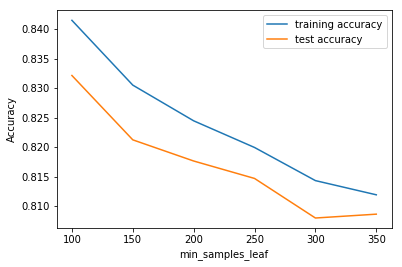

In [215]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split

In [216]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [217]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.925260,0.013606,0.845043,0.858881,200,{'min_samples_split': 200},1,0.838601,0.858509,0.842867,...,0.844483,0.858184,0.855191,0.859051,0.844075,0.859332,0.031202,0.000495,0.005486,0.000459
1,0.886225,0.014217,0.840638,0.852513,250,{'min_samples_split': 250},2,0.836868,0.855526,0.836953,...,0.841424,0.850103,0.848460,0.849695,0.839486,0.853927,0.020027,0.001465,0.004264,0.002257
2,0.950672,0.013807,0.834724,0.845869,300,{'min_samples_split': 300},3,0.834421,0.845430,0.829815,...,0.831736,0.844342,0.845095,0.845081,0.832551,0.846789,0.058683,0.000980,0.005392,0.001213
3,0.881228,0.013005,0.831399,0.842509,350,{'min_samples_split': 350},5,0.827794,0.843085,0.829204,...,0.826739,0.842761,0.843361,0.839498,0.829900,0.843118,0.028703,0.001096,0.006081,0.001569
4,0.803971,0.012411,0.831440,0.839980,400,{'min_samples_split': 400},4,0.826876,0.841734,0.828694,...,0.828268,0.838937,0.839690,0.837153,0.833673,0.840773,0.078837,0.000798,0.004722,0.001705


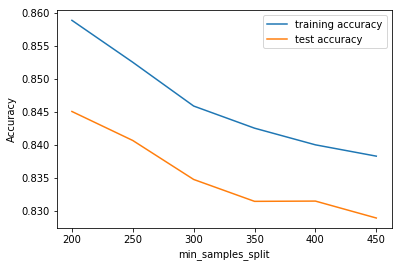

In [218]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Grid Search to Find Optimal Hyperparameters

In [219]:
#We can now find the optimal hyperparameters using GridSearchCV.

In [220]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=100)

In [221]:
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [222]:
# predict
predictions = rfc.predict(df_test_pca)

In [223]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [224]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.84      0.85      0.84      2679
        1.0       0.85      0.84      0.85      2770

avg / total       0.84      0.84      0.84      5449



In [225]:
print(confusion_matrix(y_test,predictions))

[[2277  402]
 [ 446 2324]]


In [226]:
confusion=metrics.confusion_matrix( y_test, predictions )

In [227]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [228]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)

print("specificity",specificity)
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred))
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

sensitivity 0.8389891696750903
specificity 0.8499440089585666
precision 0.8525311812179017
0.9265721555797891
precision 0.8525311812179017
PRECISION SCORE : 0.9265721555797891
RECALL SCORE : 0.9202166064981949
F1 SCORE : 0.9233834450280747
